In [1]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import rl_utils
import envlx_xiangdui
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
env = envlx_xiangdui.DroneEnv()

episode_return = 0
state = env.reset()
print(env.get_angle(),env.get_angle2goal())


0 0.7853981633974483


C:\ProgramData\anaconda3\envs\UAV\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


[0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9263512383220115, 0.025447946563934377]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9115109515709721, -0.07586592024907693]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9041479843884995, -0.1784872747040814]
[0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9072635065252511, -0.2813644394147461]
[0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9195798335503528, -0.3833210059874537]
[0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.936156686896301, -0.4836174038598196]
[0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9506122996929738, -0.5822178780714918]
[0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9576180770472101, -0.679695228662419]
[0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9546668994413124, -0.776964776023734]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9428090415820634, -0.875]
[0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9263512383220115, 0.025447946563934377]
[

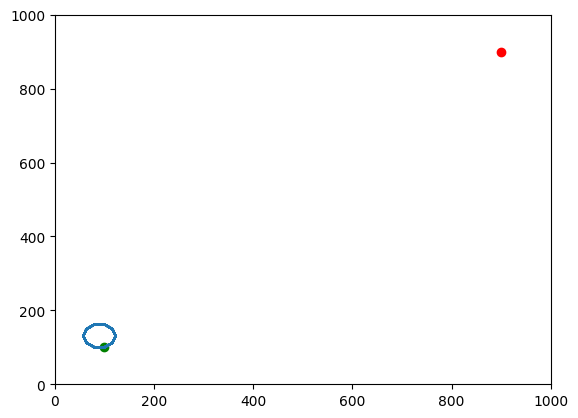

In [2]:

done = False
#绘制x,y轴
X=[]
Y=[]
count = 0
while not done:
    X.append(env.xy[0])
    Y.append(env.xy[1])
    count+=1
    action = 2 #np.random.randint(5)
    #print("航向角---转向---航向角\n")
    #print(env.heading,action,env.xy)
    next_state, reward, done = env.step(action)
    #print(env.get_angle(),env.get_angle2goal())
    #print(env.xy,env.heading)
    print(env.observation)
    state = next_state
    episode_return += reward
    #print(reward)
    if (count>300):
        done = True
#画图可视化
print(episode_return)
plt.plot(100, 100, 'go')  # 'ro'表示红色的点
plt.plot(900, 900, 'ro')  # 'ro'表示红色的点
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.plot(X,Y)
plt.show()

## 测试距离传感器

In [4]:
import math

class Drone:
    def __init__(self, x, y, heading):
        self.x = x
        self.y = y
        self.heading = heading  # 初始航向角
        self.sensor_range = 50  # 传感器范围

    def update_position(self, x, y):
        self.x = x
        self.y = y

    def distance_to_obstacle(self, obs_x, obs_y, obs_radius):
        return math.sqrt((self.x - obs_x)**2 + (self.y - obs_y)**2) - obs_radius

    def sensor_reading(self, obs):
        min_distance = self.sensor_range  # 初始化为传感器范围的最大值

        for obstacle in obs:
            obs_x, obs_y, obs_radius = obstacle
            distance_to_obstacle = self.distance_to_obstacle(obs_x, obs_y, obs_radius)

            # 计算无人机到障碍物的相对方向角
            relative_angle = math.atan2(obs_y - self.y, obs_x - self.x)

            # 计算无人机航向角与相对方向角之间的差异
            angle_diff = self.angle_difference(self.heading, relative_angle)

            # 如果差异在传感器角度范围内，并且距离在传感器范围内
            if abs(angle_diff) < math.radians(15) and 0 <= distance_to_obstacle < self.sensor_range:
                # 计算障碍物在传感器方向上的投影距离
                projected_distance = abs(distance_to_obstacle / math.cos(angle_diff))

                # 更新最小距离
                min_distance = min(min_distance, projected_distance)

        # 如果没有检测到障碍物，则返回最大距离
        return min_distance if min_distance < self.sensor_range else self.sensor_range

    def angle_difference(self, angle1, angle2):
        # 计算两个角度之间的差异（返回值范围：[-pi, pi]）
        diff = (angle2 - angle1 + math.pi) % (2 * math.pi) - math.pi
        return diff

# 示例用法
drone = Drone(x=0, y=0, heading=math.radians(45))  # 初始化无人机
obs_list = [(2, 2, 1), (4, 0, 1)]  # 障碍物列表，每个元素为 (x, y, radius)

# 模拟更新无人机位置
drone.update_position(1, 1)

# 获取传感器读数
sensor_reading = drone.sensor_reading(obs_list)

print(sensor_reading)  # 打印传感器读数
